# Word clouds | Data visualization
A word cloud is a popular data visualization technique used to represent text data in a visual and engaging manner. It visually displays the most frequently occurring words in a given text, with the size of each word proportional to its frequency. The more often a word appears in the text, the larger and bolder it appears in the word cloud.

Here's how you can create a word cloud in Python:

1. Install the necessary libraries:
   Before creating word clouds, you need to install the required libraries. The most commonly used library for creating word clouds is `wordcloud`. You can install it using pip:

   ```
   pip install wordcloud
   ```

2. Import the necessary libraries:
   Import the required libraries, including `matplotlib` for plotting the word cloud and `WordCloud` from the `wordcloud` library for generating the word cloud.

   ```python
   import matplotlib.pyplot as plt
   from wordcloud import WordCloud
   ```

3. Prepare the text data:
   Get the text data you want to visualize in the word cloud. This can be from a file, a web page, or any other source. You may need to pre-process the text data by removing any unnecessary characters, stopwords, or special symbols.

4. Generate the word cloud:
   Use the `WordCloud` object to generate the word cloud from the text data. Customize the appearance of the word cloud using various parameters like background color, maximum number of words, and font size.

   ```python
   # Example text data
   text_data = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed gravida odio vel nunc gravida, et varius libero tincidunt."

   # Create a WordCloud object
   wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text_data)

   # Display the word cloud using matplotlib
   plt.figure(figsize=(10, 5))
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis('off')
   plt.show()
   ```

   In this example, the word cloud will display the most frequent words from the text data provided.

Word clouds are commonly used to analyze textual data in various fields, including social media sentiment analysis, text summarization, and topic modeling. They offer a quick and visually appealing way to get an overview of the most prominent words in a text corpus. However, it's essential to keep in mind that word clouds are primarily a visual representation and may not be suitable for detailed textual analysis.

In [ ]:
# install these 
# pip install wordcloud
# pip install --user -U nltk
# !pip3 install nltk

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 
print(stop_words) 

{'shouldn', 'than', 'their', 'my', 'here', 'into', 'over', 'how', 'whom', 'he', 'only', 'will', 'each', 'these', "wouldn't", 'were', 'most', 'on', 'mightn', 's', 'can', 'ourselves', 'm', 'them', 'too', 'if', 'during', 'and', 'd', 'are', "shouldn't", 'having', 'myself', 'hers', 'themselves', 'was', 'yours', 'some', 'so', 'there', 'off', "doesn't", 'both', "should've", 'about', 'under', 'haven', "wasn't", 'further', 'which', 'the', 'shan', "it's", 'its', 'or', 'more', "you've", "mustn't", 'at', "mightn't", 'all', 'such', 'what', 'they', 'those', "couldn't", 'that', 'for', 'below', 'should', "aren't", 'couldn', 'am', 'her', 'because', 'few', 'll', 'yourselves', 'above', 'wouldn', 'i', 'yourself', 'again', "hadn't", 'theirs', "hasn't", 'through', 'do', 'y', 'out', 'doesn', 'your', 'down', "you'll", 'being', 'hasn', 'you', 'with', 'against', 'did', 'other', 'o', 'himself', 'as', "won't", 'very', 'just', 're', 'who', 'does', 've', 'she', 'ma', "needn't", "that'll", 'been', 'to', 'between', '

In [8]:
data = '''
What is a Word Cloud?
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.

In this tutorial, we will use a wine review dataset from the Wine Enthusiast website to learn:

How to create a basic word cloud from one to several text documents
Adjust the color, size, and number of text inside your word cloud
Mask your word cloud into any shape of your choice
Mask your word cloud into any color pattern of your choice
When to Use a Word Cloud
It's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often more visually appealing (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:

Quickly identify the most important themes or topics in a large body of text
Understand the overall sentiment or tone of a piece of writing
Explore patterns or trends in data that contain textual information
Communicate the key ideas or concepts in a visually engaging way
However, it's important to keep in mind that word clouds don't provide any context or deeper understanding of the words and phrases being used. Therefore, they should be used in conjunction with other methods for analyzing and interpreting text data.
'''
data

"\nWhat is a Word Cloud?\nMany times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.\n\nIn this tutorial, we will use a wine review dataset from the Wine Enthusiast website to learn:\n\nHow to create a basic word cloud from one to several text documents\nAdjust the color, size, and number of text inside your word cloud\nMask your word cloud into any shape of your choice\nMask your word cloud into any color pattern of your choice\nWhen to Use a Word Cloud\nIt's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often mo

In [9]:
#  Pre-processing data

def data_processing(data):
    #lowercase conversion
    data = data.lower()
    #word tokenize data
    data_tokens = word_tokenize(data)
    #remove stopwords
    processed_words = [w for w in data_tokens if not w in stop_words]
    return " ".join(processed_words)

This Python code defines a function called `data_processing` that processes a given text data to perform the following steps:

1. Lowercase Conversion: The function first converts the entire text data to lowercase using the `lower()` method. This step ensures that all words in the text are in lowercase, making it easier for further processing and analysis. For example, "Hello World" will become "hello world."

2. Word Tokenization: The function then uses the NLTK library's `word_tokenize()` function to tokenize the lowercased text data. Tokenization is the process of breaking down a text into individual words or tokens. For example, "hello world" will be tokenized as ["hello", "world"].

3. Removing Stopwords: Stopwords are common words like "the," "and," "is," etc., that are frequently used in a language but often don't carry much meaning in the context of text analysis. The function uses a list comprehension to remove these stopwords from the tokenized words. The `stop_words` variable is expected to contain a set of stopwords, which must be provided separately in the code.

4. Joining Processed Words: After removing the stopwords, the function uses the `join()` method to concatenate the remaining words back into a single string, separated by spaces. This step is necessary to obtain the processed text data in a format that can be easily used for further analysis or visualization.

5. Returning the Result: Finally, the function returns the processed text data as a single string.

To use this function, you need to make sure the NLTK library is installed and that you have the `stop_words` variable containing the set of stopwords. The function can be called with any text data as input, and it will return the processed text with stopwords removed and all words in lowercase. This kind of data processing is commonly used in natural language processing tasks to prepare text data for analysis, sentiment analysis, topic modeling, and more.

The expression `[w for w in data_tokens if not w in stop_words]` is a list comprehension in Python. It is used to create a new list by filtering out elements from the original list (`data_tokens`) based on a certain condition. Let me break it down step by step:

1. `data_tokens`: It is a list that contains individual words obtained by tokenizing a text.

2. `stop_words`: It is a set that contains common words (e.g., "the", "is", "and") that are often removed during text processing because they don't carry significant meaning.

3. `w for w in data_tokens`: This is the first part of the list comprehension, which indicates that we want to iterate over each element (`w`) in the list `data_tokens`.

4. `if not w in stop_words`: This is the conditional part of the list comprehension. It checks if the current word (`w`) is not present in the set `stop_words`. If the word is not in the set, it means it is not a common word, and we want to keep it in the new list.

Putting it all together, the list comprehension creates a new list that contains only those words from `data_tokens` that are not common stop words. In other words, it filters out the stop words and keeps only meaningful words in the new list.

For example, let's say `data_tokens` is `['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']`, and `stop_words` is `{'the', 'over'}`. The list comprehension will produce the following new list:

`['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']`

As you can see, it removed the stop words "the" and "over" from the original list, leaving only the meaningful words in the new list. This kind of filtering is commonly used in text processing tasks to clean and prepare the data for further analysis.

In [11]:
# Pre-processed data

data_processed = data_processing(data)
data_processed

"word cloud ? many times might seen cloud filled lots words different sizes , represent frequency importance word . called tag cloud word cloud . tutorial , learn create word cloud python customize see fit . tool handy exploring text data making report lively . tutorial , use wine review dataset wine enthusiast website learn : create basic word cloud one several text documents adjust color , size , number text inside word cloud mask word cloud shape choice mask word cloud color pattern choice use word cloud 's important remember word clouds useful visualizing common words text data set , 're usually useful high-level overview themes . 're similar bar blots often visually appealing ( albeit times harder interpret ) . word clouds particularly helpful want : quickly identify important themes topics large body text understand overall sentiment tone piece writing explore patterns trends data contain textual information communicate key ideas concepts visually engaging way however , 's import

In [12]:
# Original data
data

"\nWhat is a Word Cloud?\nMany times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.\n\nIn this tutorial, we will use a wine review dataset from the Wine Enthusiast website to learn:\n\nHow to create a basic word cloud from one to several text documents\nAdjust the color, size, and number of text inside your word cloud\nMask your word cloud into any shape of your choice\nMask your word cloud into any color pattern of your choice\nWhen to Use a Word Cloud\nIt's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often mo

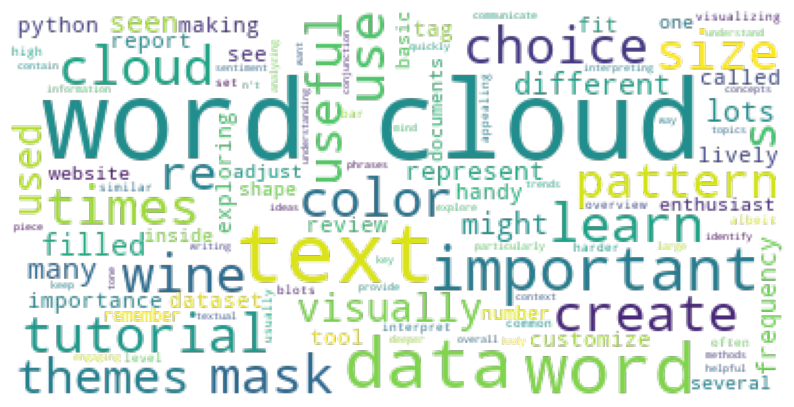

In [16]:
plt.figure(figsize = (10,10), facecolor = 'none') 
wordcloud = WordCloud(background_color=None, mode='RGBA').generate(data_processed) 
plt.imshow(wordcloud, interpolation=None)
plt.axis("off") 
plt.show()

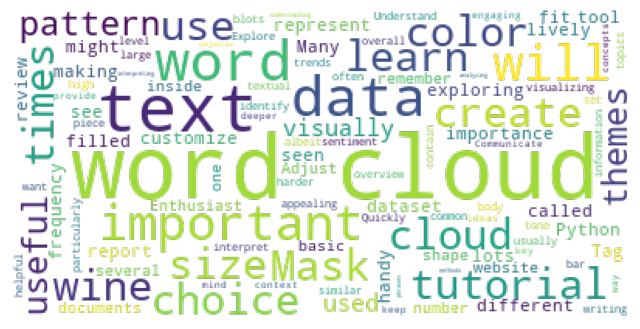

In [19]:
# lets try this with orignal data

plt.figure(figsize = (8,8), facecolor = 'none') 
wordcloud = WordCloud(background_color=None, mode='RGBA').generate(data) 
plt.imshow(wordcloud, interpolation=None)
plt.axis("off") 
plt.show()

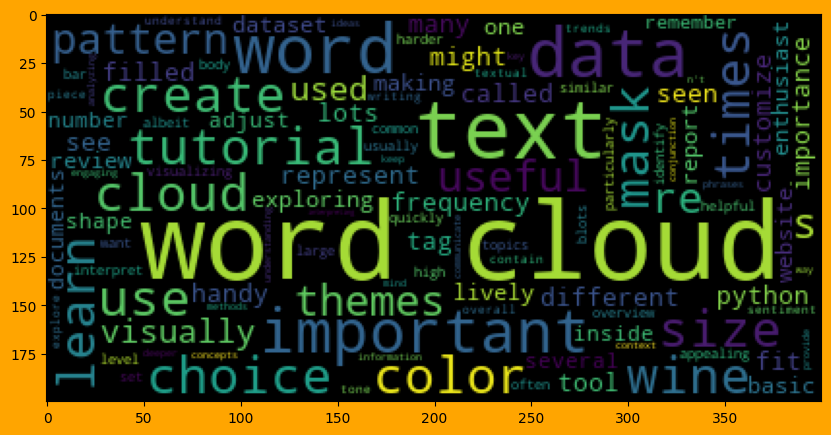

In [25]:
plt.figure(figsize = (10,10), facecolor = 'orange')  #border color
wordcloud = WordCloud( mode='RGBA').generate(data_processed) 
plt.imshow(wordcloud, interpolation=None)
# plt.axis("off")  # axis
plt.show()

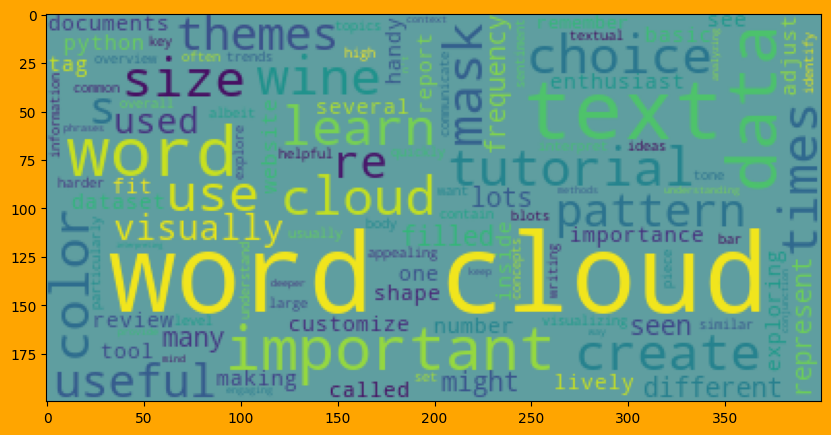

In [33]:
plt.figure(figsize = (10,10), facecolor = 'orange')  #border color
wordcloud = WordCloud(background_color='cadetblue', mode='RGBA').generate(data_processed) 
plt.imshow(wordcloud, interpolation=None)
# plt.axis("off")  # axis
plt.show()

In [34]:
import os
# os.chdir(r'<Add your file path here>')

In [35]:
from PIL import Image
mask = np.array(Image.open("tajmask2.jpg"))

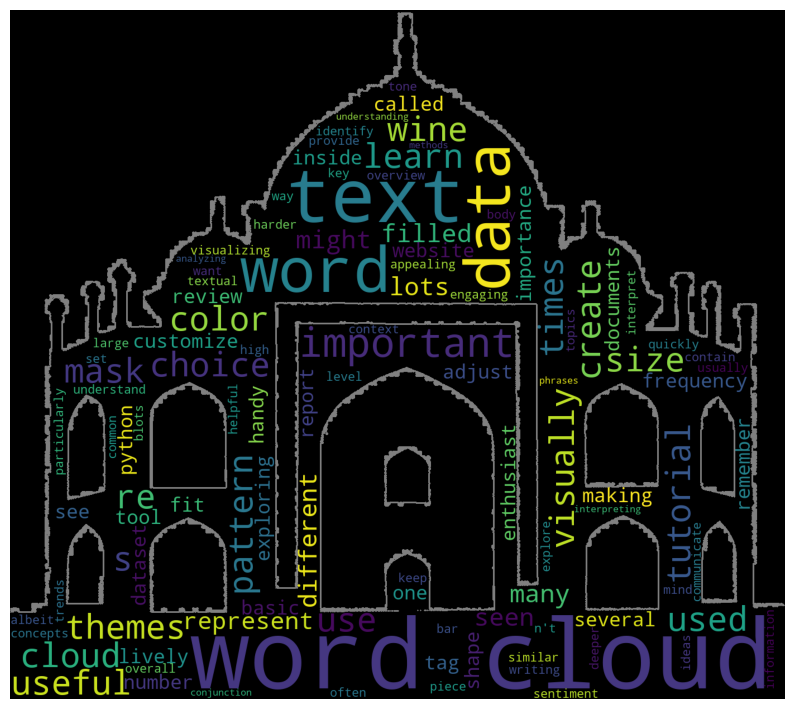

In [40]:
mwc = WordCloud(contour_color='grey', mask=mask, contour_width=2)
mwc.generate(data_processed)
plt.figure(figsize=(10, 10))
plt.imshow(mwc)
plt.axis('off')
plt.show()

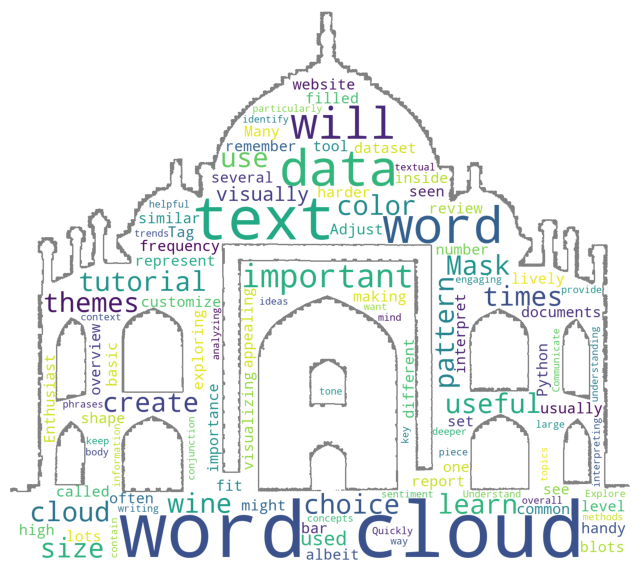

In [44]:
mwc = WordCloud(background_color='white', contour_color='grey', mask=mask, contour_width=2)
mwc.generate(data)
plt.figure(figsize=(8, 8))
plt.imshow(mwc)
plt.axis('off')
plt.show()

In [45]:
mwc.to_file("wordcloud_tajmahal.png")

In [49]:
withborder
mask2 = np.array(Image.open("github_transparent.png"))

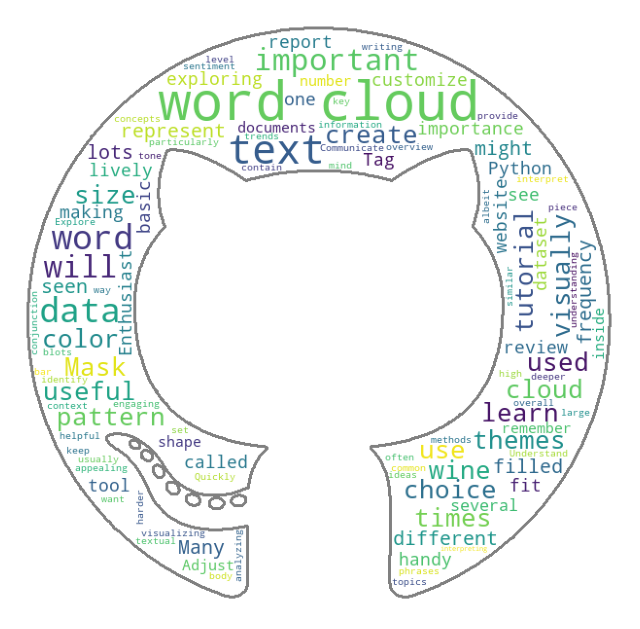

In [50]:
mwc = WordCloud(background_color='white', contour_color='grey', mask=mask2, contour_width=2)
mwc.generate(data)
plt.figure(figsize=(8, 8))
plt.imshow(mwc)
plt.axis('off')
plt.show()

In [51]:
mask2 = np.array(Image.open("withborder.png"))

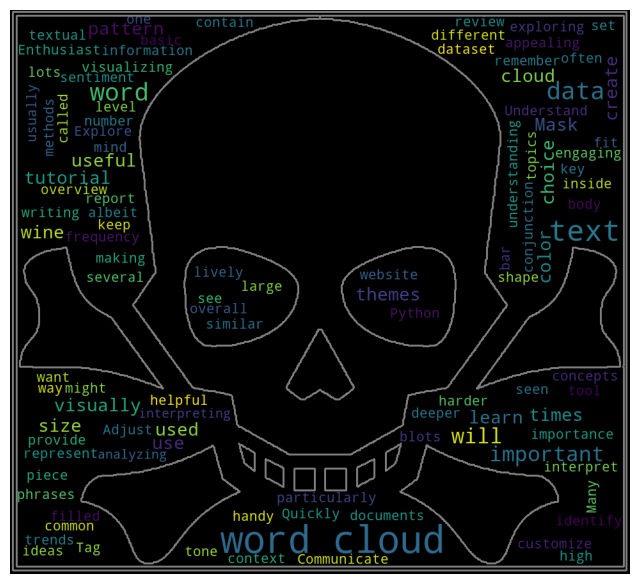

In [53]:
mwc = WordCloud( contour_color='grey', mask=mask2, contour_width=2)
mwc.generate(data)
plt.figure(figsize=(8, 8))
plt.imshow(mwc)
plt.axis('off')
plt.show()

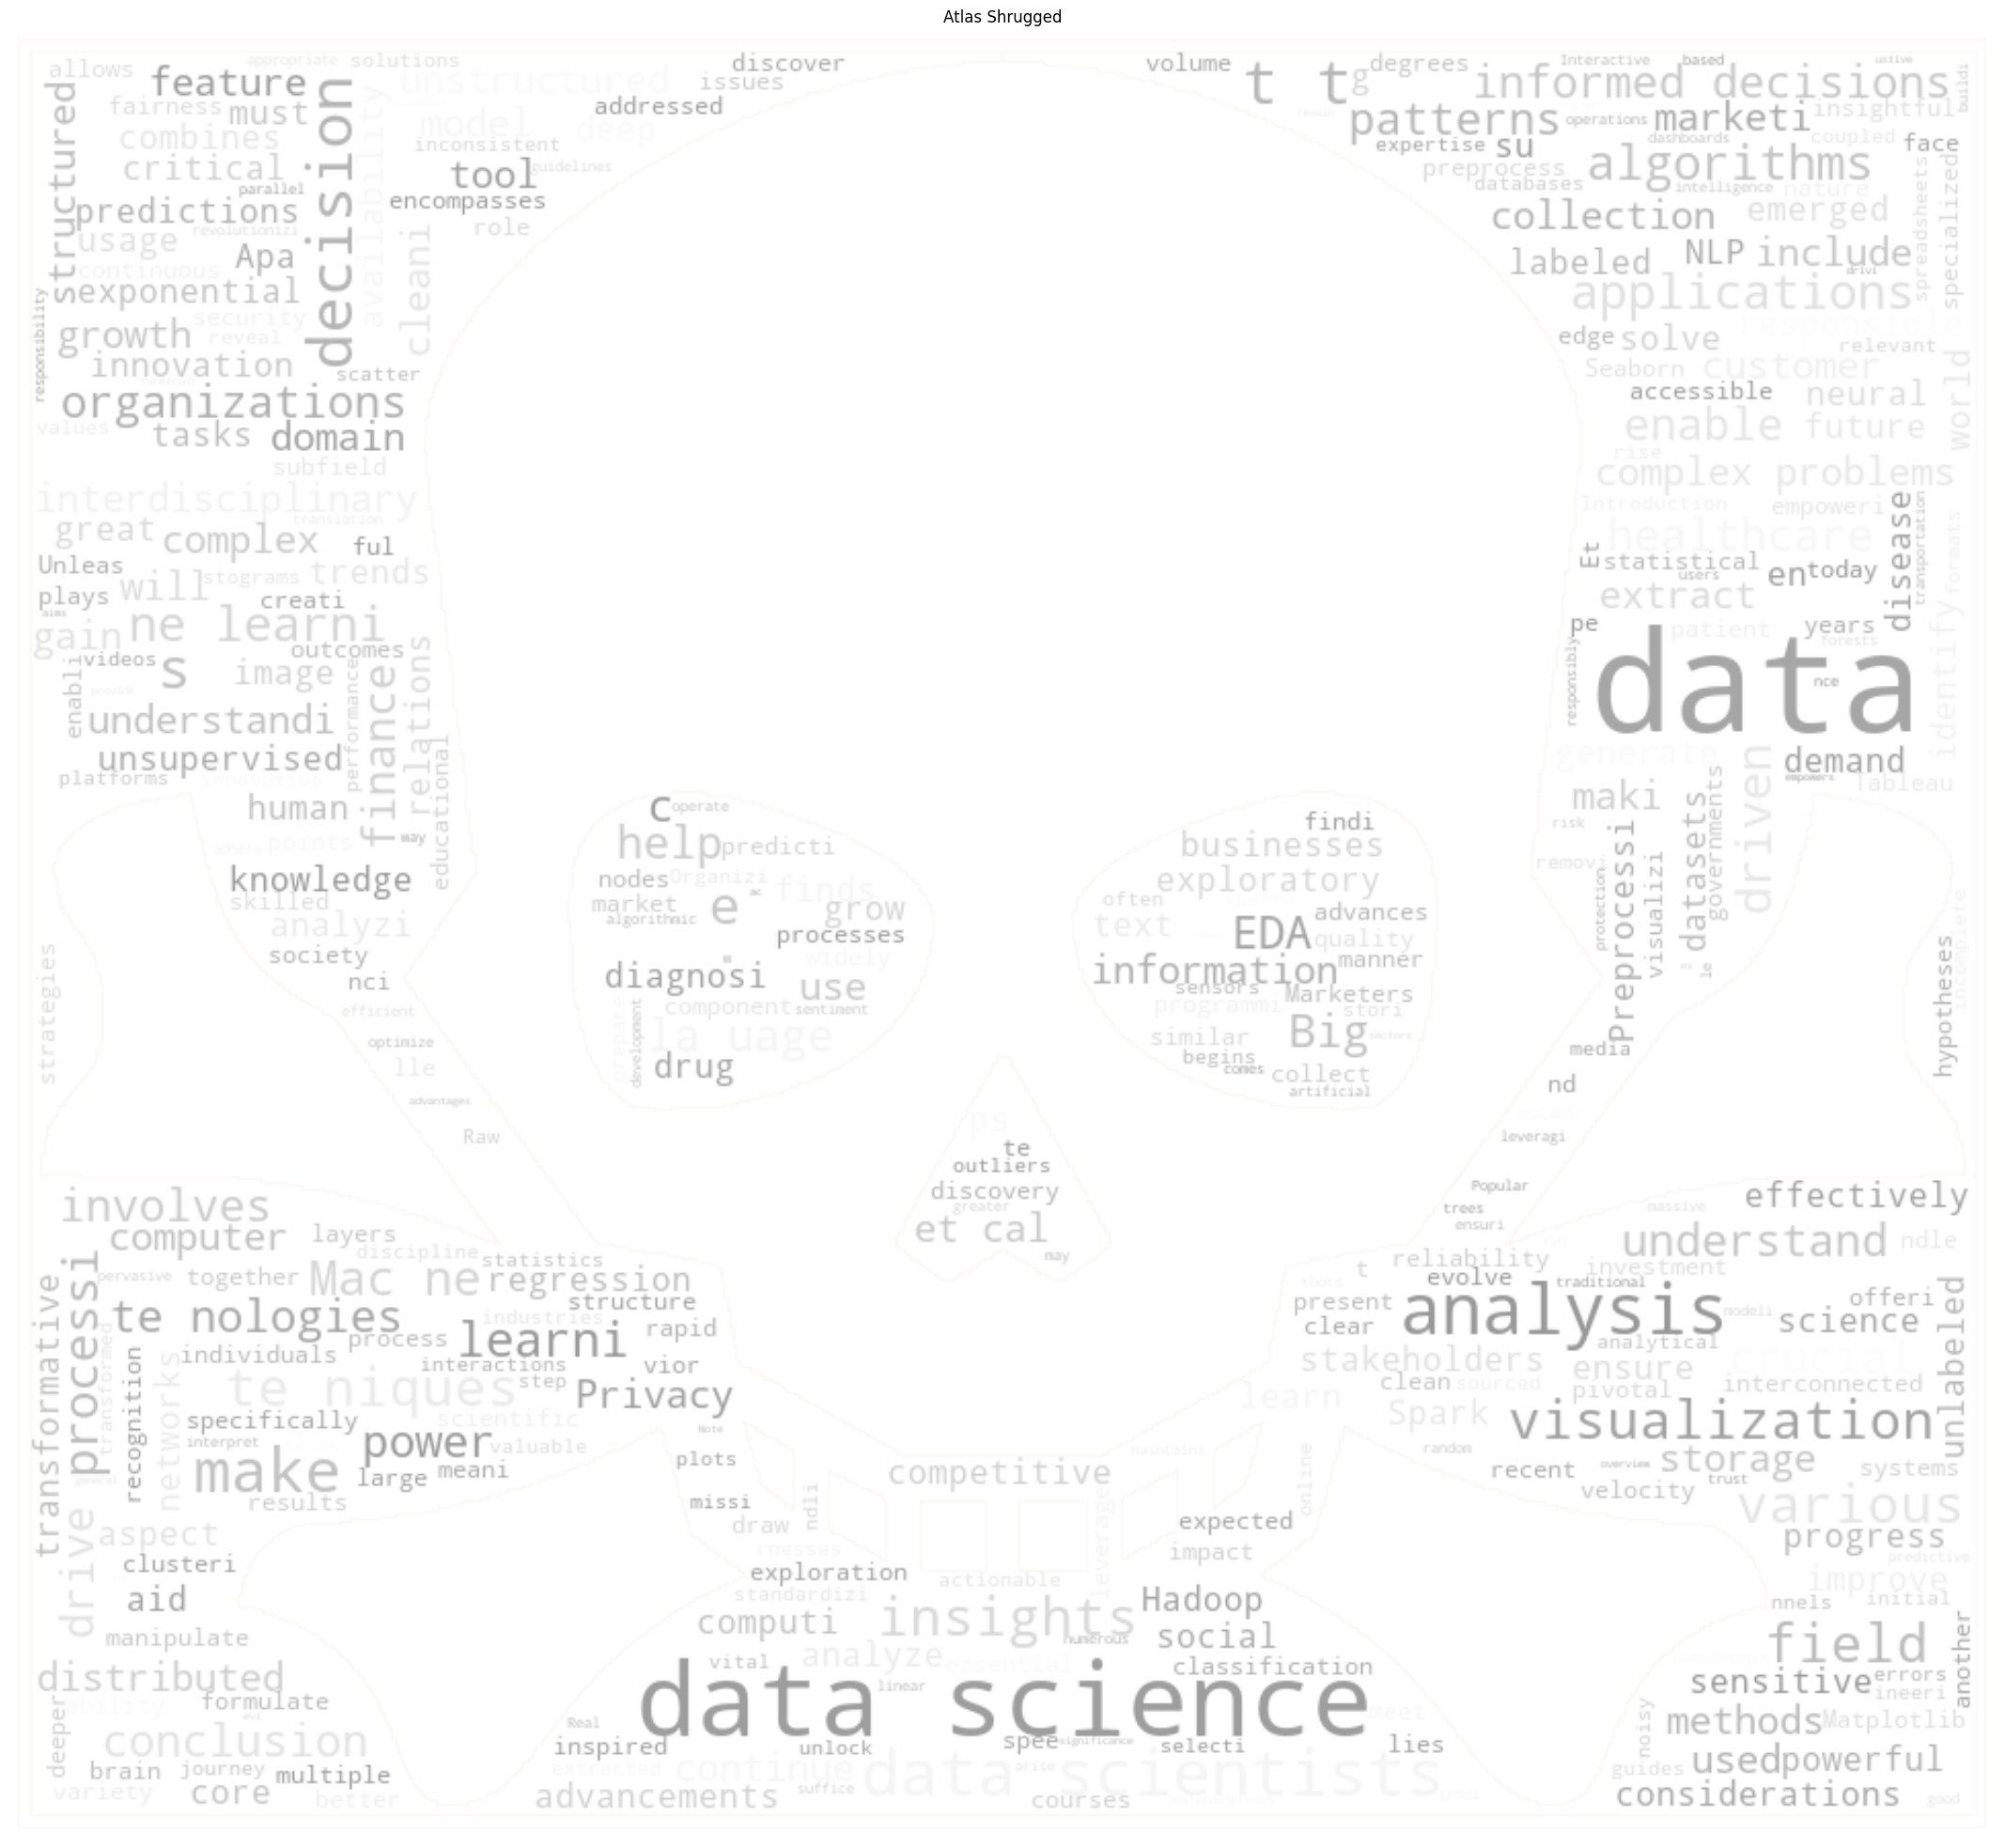

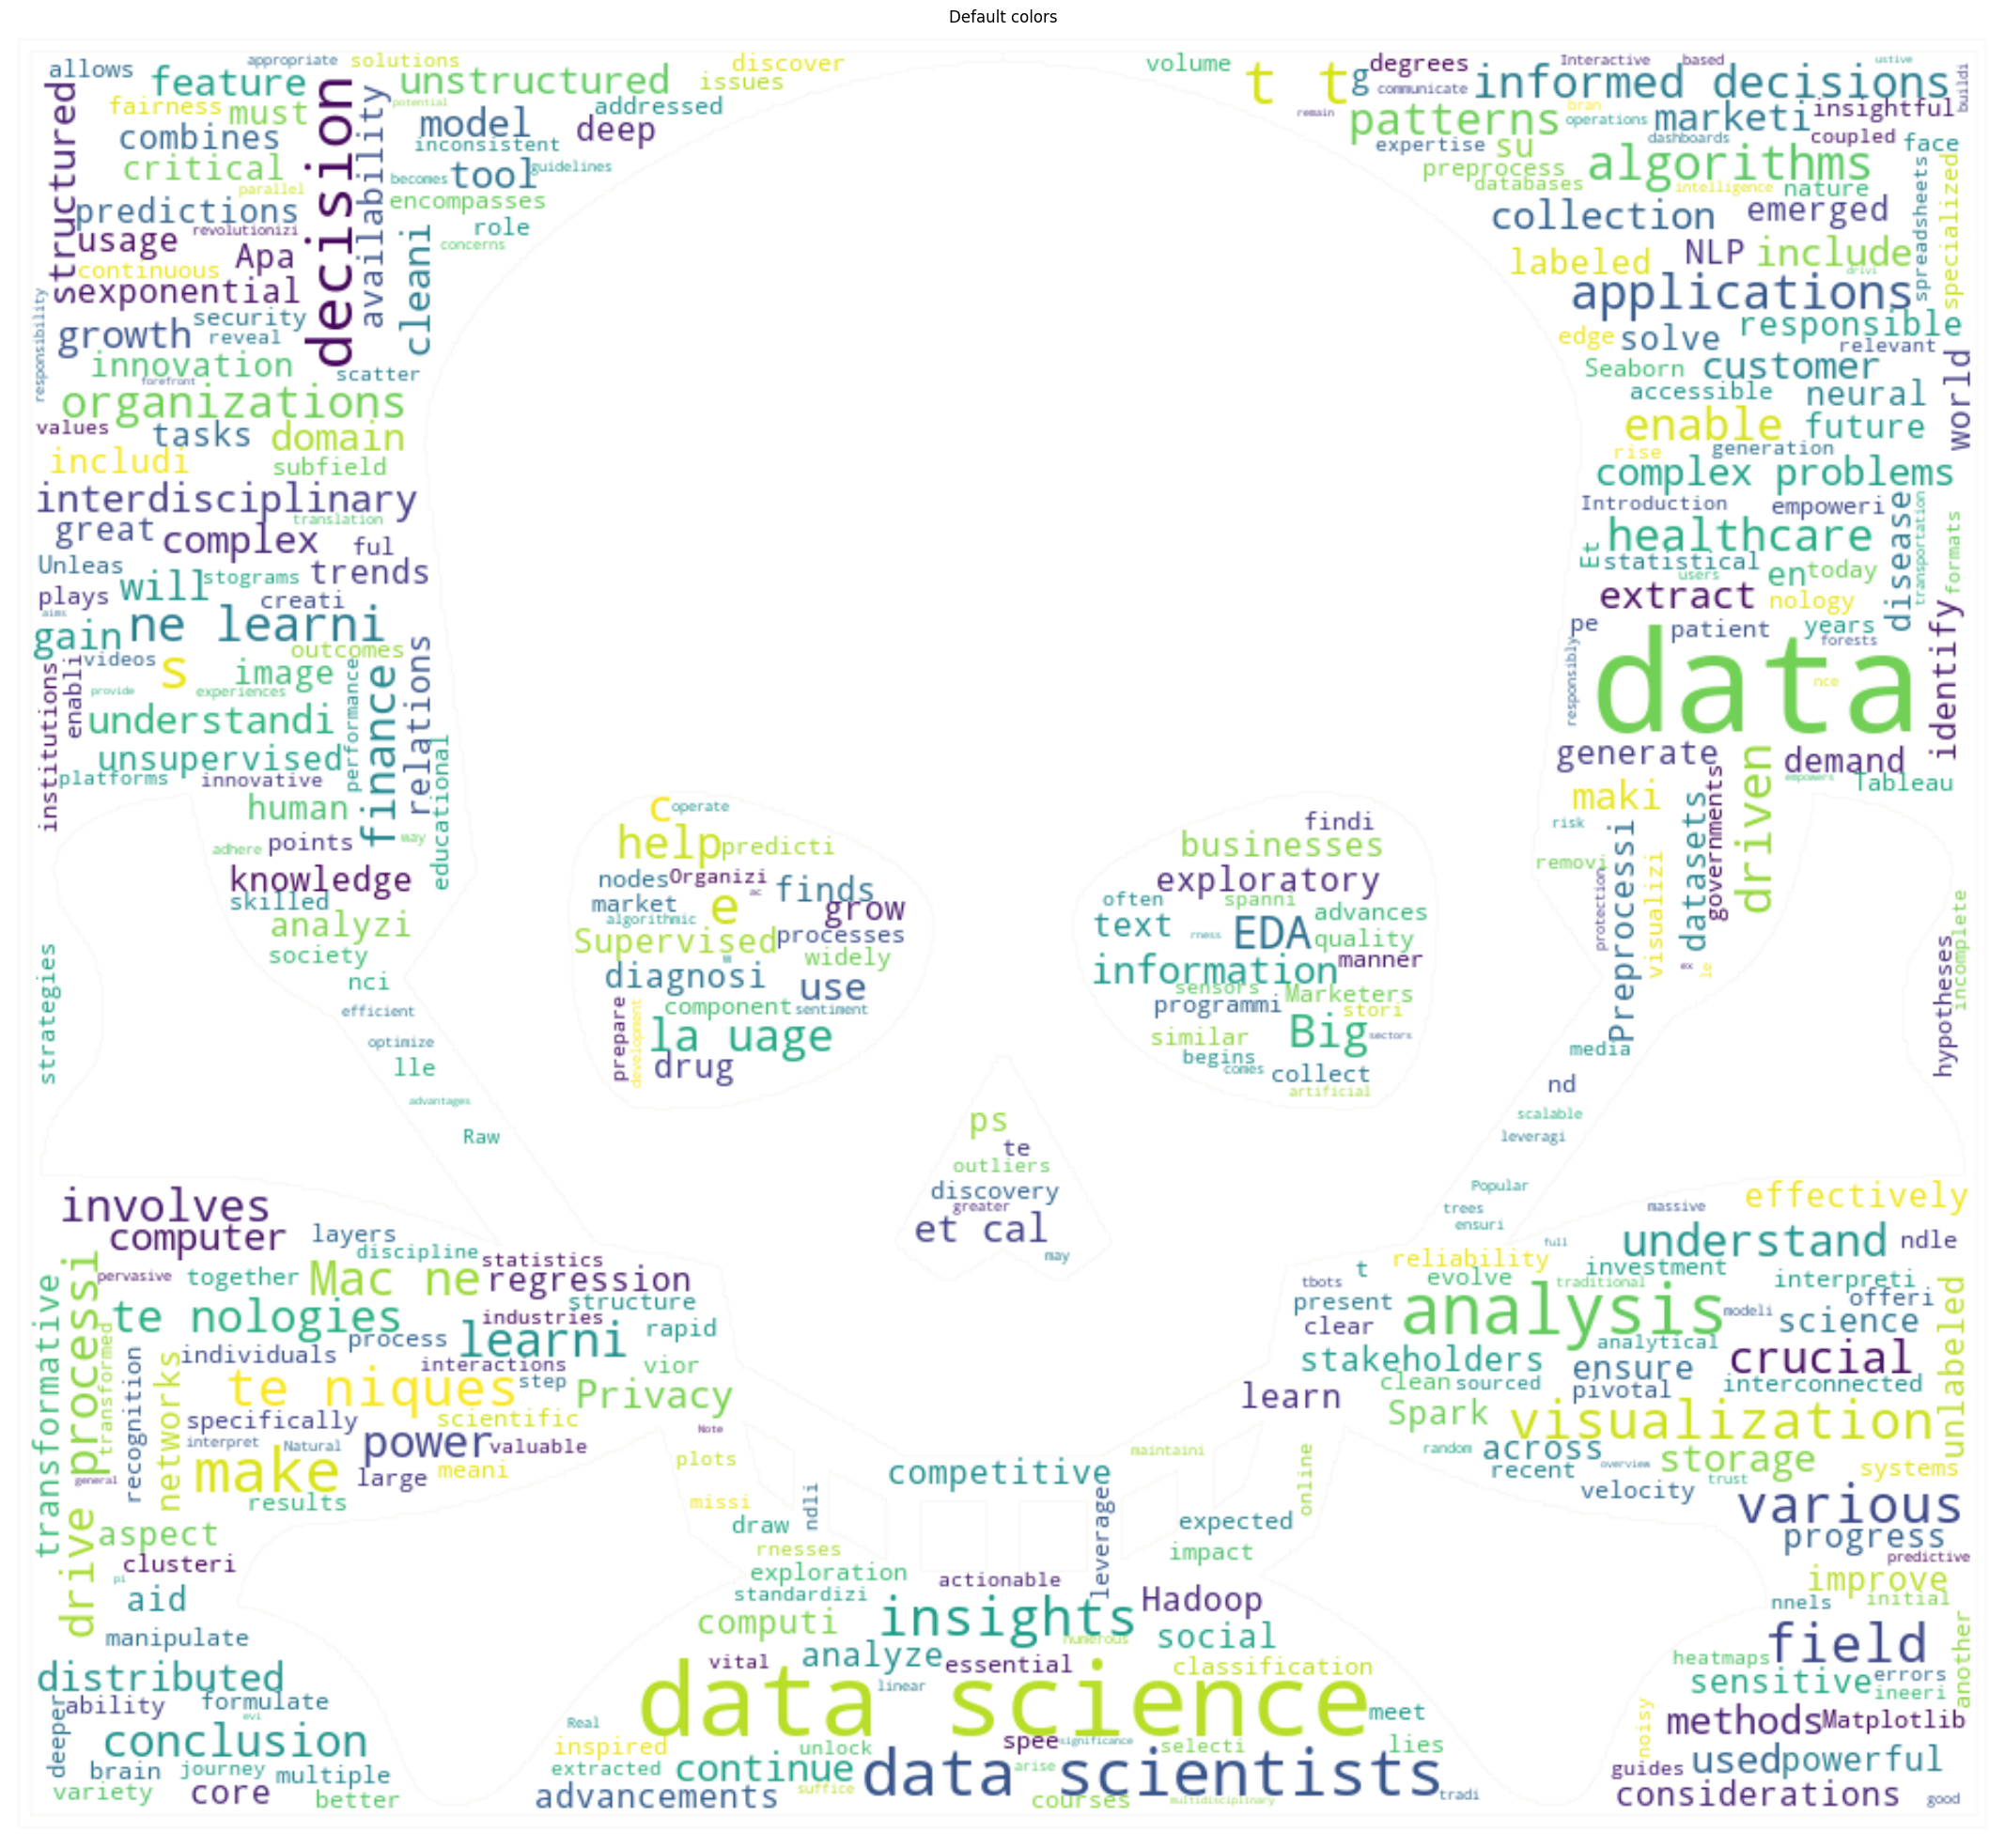

In [62]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
mask = np.array(Image.open(path.join(d, "withborder.png")))

# text of Atlas Shrugged

text = open(path.join(d, 'wordsfile.txt')).read()

# pre-processing the text a little bit
text = text.replace("said", ".")
text = text.replace("ha", ".")
text = text.replace("hi", ".")
text = text.replace("ng", ".")
text = text.replace("ch", ".")

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white",
               width=1200,
               height=800,
               max_words=550000,
               mask=mask,
               stopwords=stopwords,
               margin=3,
               contour_color='#FAF9F6',
               contour_width=0.5,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()

#Custom Image
plt.figure(figsize=(50,25))
plt.title("Atlas Shrugged")

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
#wc.to_file("a_new_hope.png")

plt.axis("off")
plt.figure(figsize=(50,25))
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

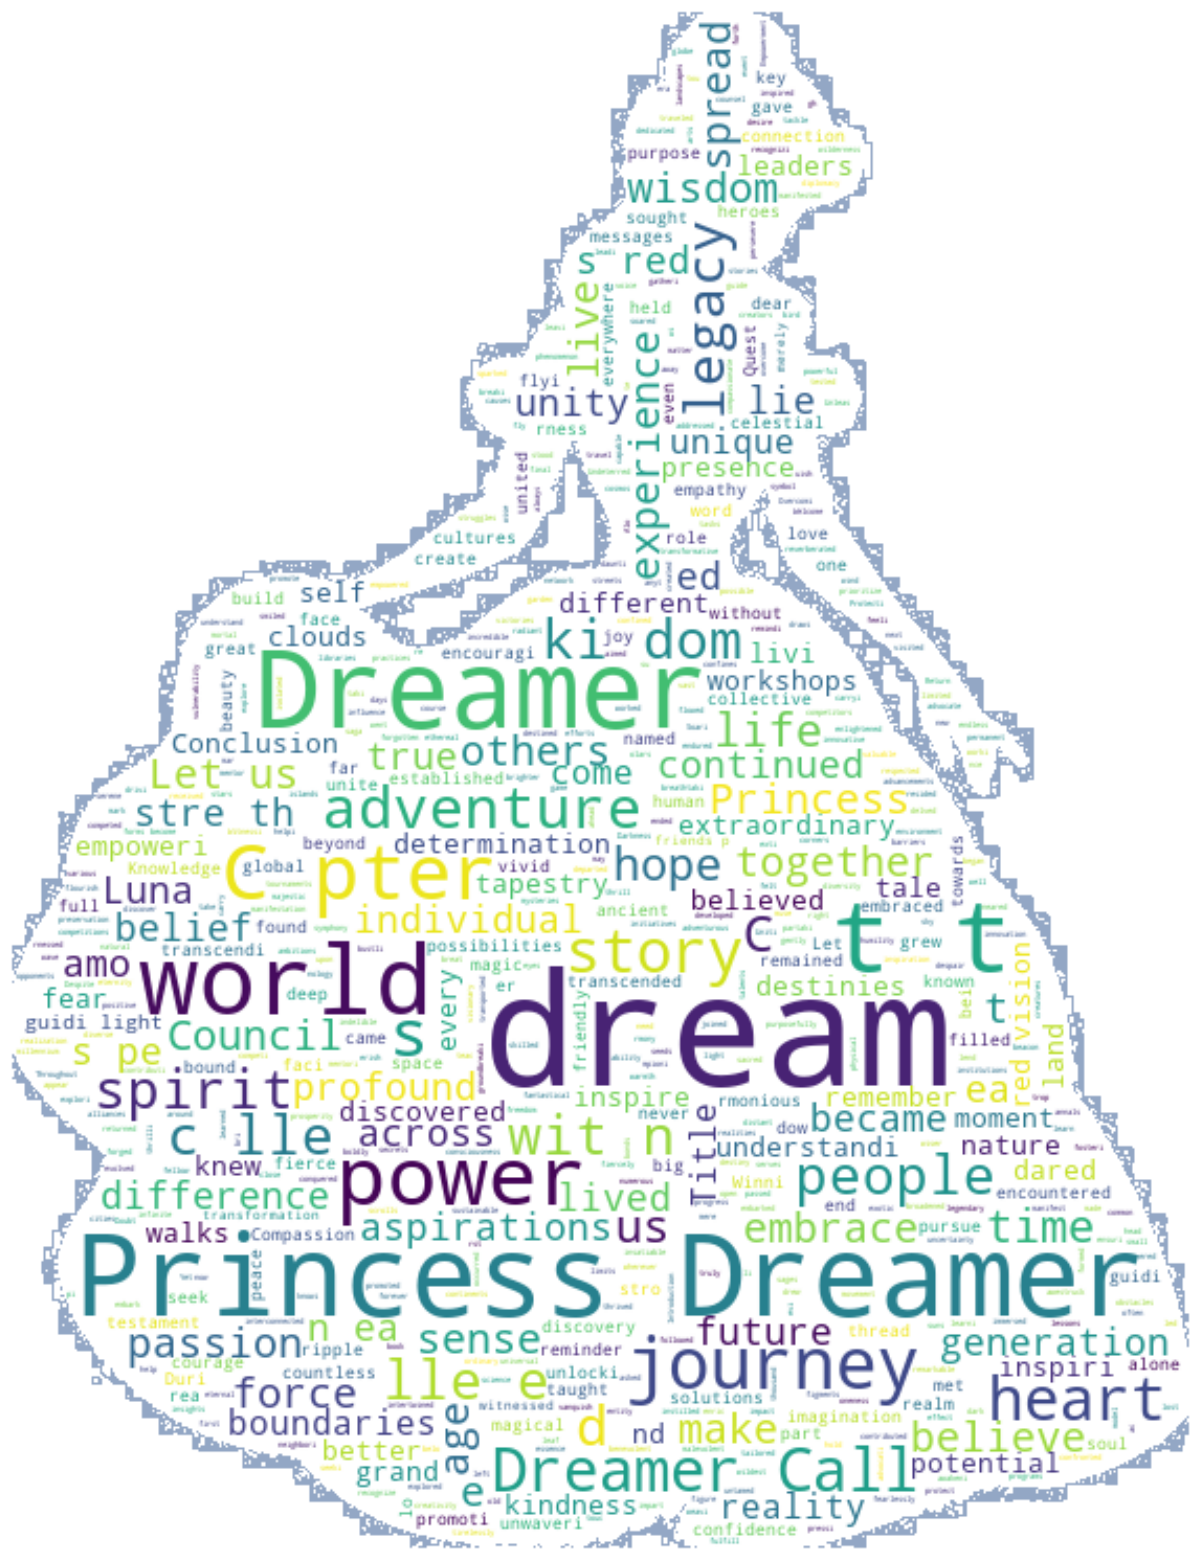

In [82]:

# Get the current working directory
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the mask image taken from "princess.jpg"
mask = np.array(Image.open(path.join(d, "princes.jpg")))

# Read the text from "justadream.txt"
text = open(path.join(d, 'justadream.txt')).read()

# Pre-process the text by removing certain words
text = text.replace("said", ".")
text = text.replace("ha", ".")
text = text.replace("hi", ".")
text = text.replace("ng", ".")
text = text.replace("ch", ".")

# Set up a set of stopwords to be ignored in the word cloud
stopwords = set(STOPWORDS)

# Generate the WordCloud object with specific configurations
wc = WordCloud(background_color="white",
               max_words=550000,
               mask=mask,
               stopwords=stopwords,
               contour_color='#93A7C5',
               contour_width=0.8,
               random_state=1).generate(text)

# Convert the word cloud into an array of default colors
default_colors = wc.to_array()

# Display the WordCloud with default colors
plt.figure(figsize=(30, 20))
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()


In [83]:
wc.to_file("new2.png")